In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('vgsales.csv', index_col='Rank')
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
columns_to_drop = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
data.drop(columns_to_drop, axis=1, inplace=True)
data.head()

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37


In [4]:
data.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [5]:
data['Year'] = data['Year'].fillna(data['Year'].mean())

In [6]:
data.isnull().sum()

Platform         0
Year             0
Genre            0
Publisher       58
Global_Sales     0
dtype: int64

In [7]:
data = data.dropna(axis=0)

In [8]:
data.isnull().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [9]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [11]:
data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [12]:
counts = data['Publisher'].value_counts()
counts

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [13]:
data['Publisher'] = data['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

In [14]:
data

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Small Publisher,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [15]:
counts = data['Publisher'].value_counts()
counts

Small Publisher                           3342
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Microsoft Gam

In [16]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data
data = onehot_encode(data, onehot_columns)
data

,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1985.0,40.24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008.0,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1996.0,31.37,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0.01,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16597,2003.0,0.01,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16598,2008.0,0.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data.columns

Index(['Year', 'Global_Sales', '2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA',
       'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
       'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU',
       'X360', 'XB', 'XOne', 'Action', 'Adventure', 'Fighting', 'Misc',
       'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
       'Sports', 'Strategy', '505 Games', '5pb', 'Acclaim Entertainment',
       'Activision', 'Atari', 'Atlus', 'Banpresto', 'Bethesda Softworks',
       'Capcom', 'Codemasters', 'Crave Entertainment', 'D3Publisher',
       'Deep Silver', 'Disney Interactive Studios', 'Eidos Interactive',
       'Electronic Arts', 'Empire Interactive', 'Focus Home Interactive',
       'Hudson Soft', 'Idea Factory', 'Ignition Entertainment', 'Infogrames',
       'Kadokawa Shoten', 'Konami Digital Entertainment', 'LucasArts',
       'Majesco Entertainment', 'Marvelous Interactive',
       'Microsoft Game Studios', 'Midway

In [18]:
y = data['Global_Sales']
X = data.drop('Global_Sales', axis=1)

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X.shape

(16540, 91)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [23]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(91,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse'
)


batch_size = 64
epochs = 18

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

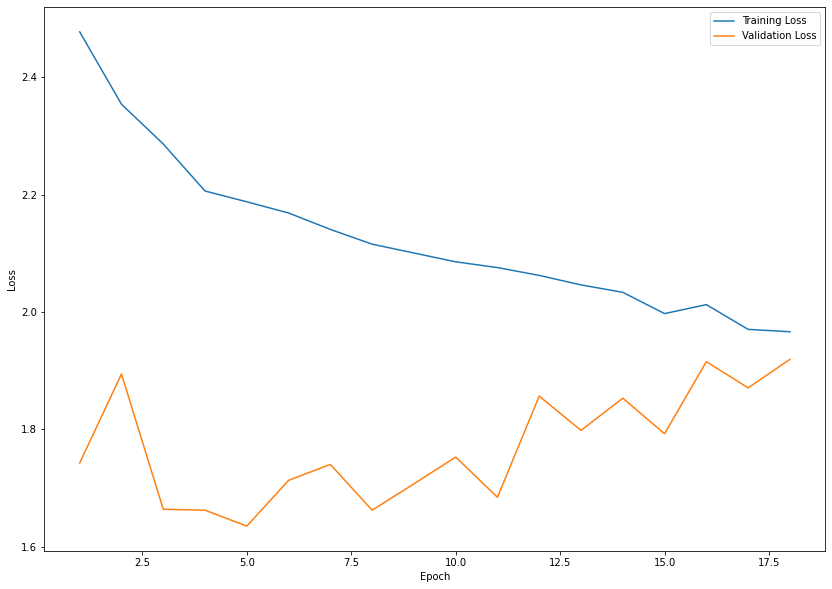

In [25]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [26]:
np.argmin(val_loss)

4

In [30]:
from tensorflow_addons.metrics import RSquare

y_pred = np.squeeze(model.predict(X_test))

result = RSquare()
result.update_state(y_test, y_pred)

print("R^2 Score:", result.result())



ModuleNotFoundError: No module named 'tensorflow_addons'

In [28]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 596us/step - loss: 1.7674


1.7673579454421997

In [29]:
history.history['val_loss']

[1.7428311109542847,
 1.8944458961486816,
 1.6639512777328491,
 1.6623560190200806,
 1.6352788209915161,
 1.713254451751709,
 1.7403910160064697,
 1.6624246835708618,
 1.707236886024475,
 1.7528870105743408,
 1.6843708753585815,
 1.8567299842834473,
 1.7983487844467163,
 1.8531965017318726,
 1.7927179336547852,
 1.9154372215270996,
 1.8707720041275024,
 1.9193267822265625]